# Finding the Avocado type using Machine Learning Algorithms

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Exploratory Data Analysis](#section3)
4. [Applying Logistic Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets.](#section402)<br>
    - 4.3 [Logistic regression in scikit-learn](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
    - 4.5 [Model Evaluation using accuracy classification score](#section405)<br>
    - 4.6 [Model Evaluation using confusion matrix](#section406)<br>
    
5. [Applying Random Forest](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 
    
6. [Conclusion](#section6)<br>
    


<a id=section1></a> 


### 1. Problem Statement

The goal is to predict the __Type__ of Avocados sold using __Logistic Regression and Random Forest alogorithms__

<a id=section2></a> 

### 2. Data Loading and Description

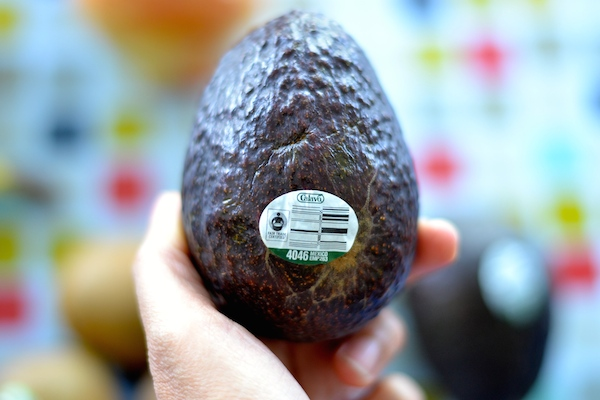


- The dataset consists of the historical information about the Avocados sold in multiple US markets, below table explains various variables present in the dataset.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Unnamed: 0	   | Index                                                  | 
| Date             | The date of the observation                            |  
| AveragePrice	   | The average price of a single aocado                   | 
| Total Volume	   | Total number of avocados sold                          |   
| 4046             | Total number of avocados with PLU 4046 sold            |
| 4225             | Total number of avocados with PLU 4225 sold            |
| 4770             | Total number of avocados with PLU 4770 sold            |
| Total Bags	   | Total No.of Bags                                       |
| Small Bags	   | Small bags                                             |
| Large Bags	   | Large Bags                                             |
| XLarge Bags	   | Extra Large Bags                                       |
| type	           | Conventional or Organic                                | 
| year	           | The year                                               | 
| region	       | The city or region of the observation                  | 

#### Importing Packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [2]:
Avocado_data=pd.read_csv(r"https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv") #reading the file

In [3]:
Avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- head() displays all the columns of first five records from the dataset


<a id=section3></a> 

## 3. Exploratory Data Analysis

In [3]:
Avocado_data.shape

(18249, 14)

- There are __18249__ rows/observations and __14__ columns

In [5]:
Avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Out of 14 columns, 2 are type: Int, 2 are type: Object and rest are float

In [6]:
Avocado_data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
Avocado_data['Date']=pd.to_datetime(Avocado_data['Date'])

- We have converted date column to pandas datetime format.

In [5]:
Avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
Avocado_data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There are no missing values in the dataset

In [7]:
Avocado_data.drop('Unnamed: 0',axis=1,inplace=True)
Avocado_data.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Dropped __Unnamed: 0__ column from the dataset, since it is not of any use.

In [8]:
print(Avocado_data['AveragePrice'].max())
print(Avocado_data['AveragePrice'].min())
print(Avocado_data.groupby('type')['AveragePrice'].max())
print(Avocado_data.groupby('type')['AveragePrice'].min())

3.25
0.44
type
conventional    2.22
organic         3.25
Name: AveragePrice, dtype: float64
type
conventional    0.46
organic         0.44
Name: AveragePrice, dtype: float64


- Maximum Average price of an Avocado is __3.25__
- Minimum Average price of an Avocado is __0.44__
- Average minimum and maximum score is registerdd for _Organic__ type.
- Average minimum score for type __conventional__ is __0.46__
- Avetrage maximum score for type __conventional__ is __2.22__


Total regions : 54
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse  

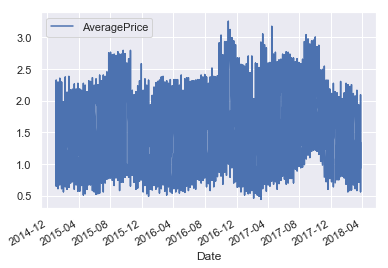

In [9]:
regions = Avocado_data.groupby(Avocado_data.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))
PREDICTING_FOR = "TotalUS"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)
Avocado_data.plot(x='Date', y='AveragePrice', kind="line")

- Total number of regions are 54
- length of all regions are same except for region WestTexNewMexico

conventional    9126
organic         9123
Name: type, dtype: int64

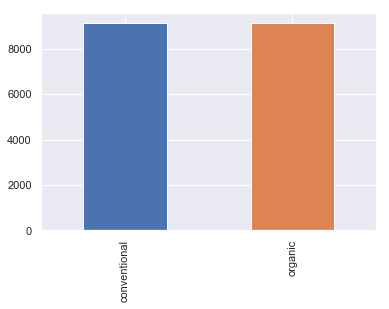

In [12]:
Avocado_data.type.value_counts().plot(kind='bar')
Avocado_data.type.value_counts()

- Total Value count for type __Conventional__ is __9126__
- Total value count for type __Oragnic__ is __9123__

In [13]:
Avocado_data.groupby('type').describe()

4046                                                 \
               count           mean           std    min        25%   
type                                                                  
conventional  9126.0  578611.649925  1.742501e+06  72.06  31935.380   
organic       9123.0    7311.281600  2.350155e+04   0.00    157.915   

                                                     4225                 \
                     50%         75%          max   count           mean   
type                                                                       
conventional  104706.745  364716.870  22743616.17  9126.0  574805.318859   
organic          911.460    4354.415    361996.84  9123.0   15411.857724   

               ...   XLarge Bags               year                         \
               ...           75%        max   count         mean       std   
type           ...                                                           
conventional   ...      2409.215  551693.65  9126.0  2016.147929  0.939968   
organic        ...         0.000     510.41  9123.0  2016.147868  0.939961   

                                                      
                 min     25%     50%     75%     max  
type                                                  
conventional  2015.0  2015.0  2016.0  2017.0  2018.0  
organic       2015.0  2015.0  2016.0  2017.0  2018.0  

[2 rows x 80 columns]

-

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


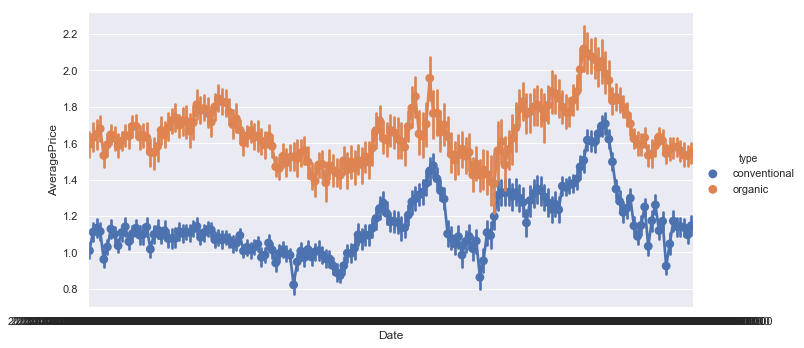

In [125]:
sns.factorplot(x='Date', y='AveragePrice',data=Avocado_data,hue='type',aspect=2)

- AveragePrice for type __Organic__ is almost every time higher than __conventional__.
- At one point of time average prices have overlapped.


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


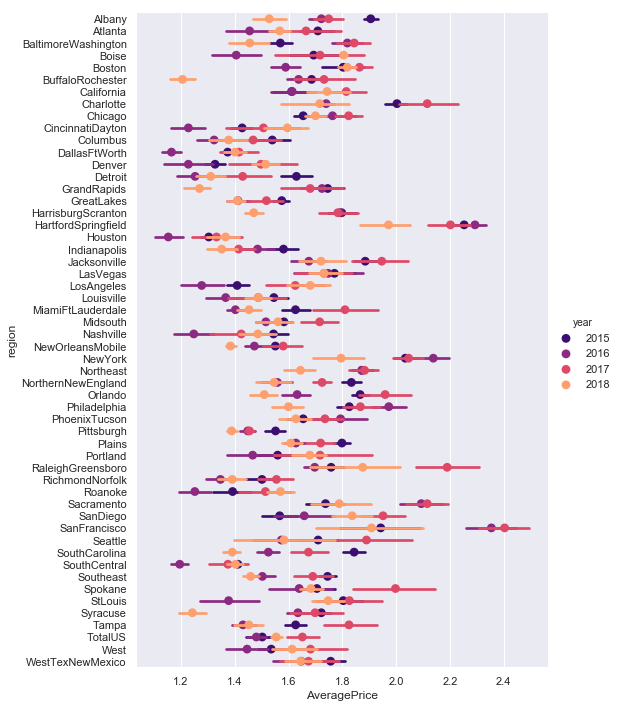

In [9]:
mask = Avocado_data['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=Avocado_data[mask],
                   hue='year',
                   size=10,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

- Average priceof Organic  Avocados in SanFrancisco year 2017 were very expensive.
- Average price of Organic Avocados in Houston year 2016 were cheap.

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


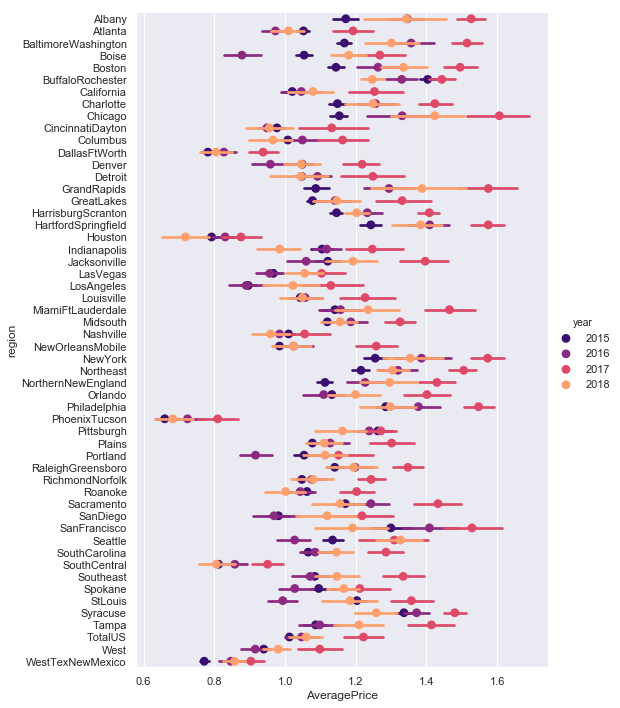

In [8]:
mask = Avocado_data['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=Avocado_data[mask],
                   hue='year',
                   size=10,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

- Average priceof Conventional  Avocados in Chicago year 2017 were very expensive.
- Average price of Conventional Avocados in Phoenix Tucson year 2018 were cheap.

Text(0.5,1,'Correlation between features')

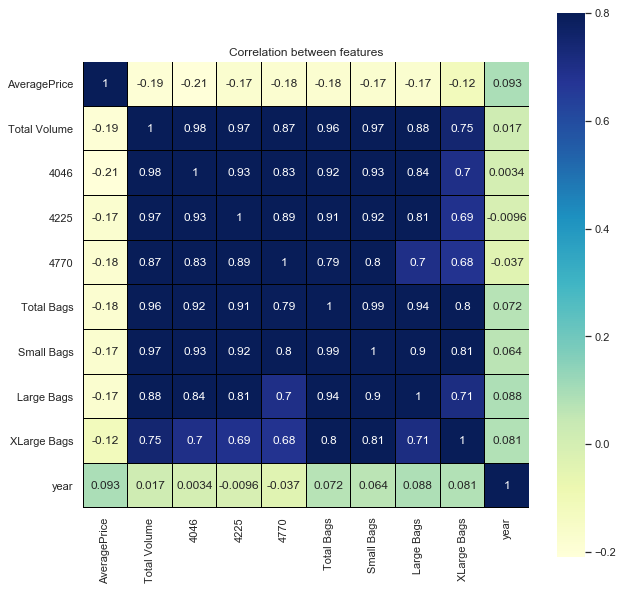

In [9]:
corr = Avocado_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- Average price is negatively correlated with most of the columns
- Total Volume is strongly correlated with 4046,4225,Total Bags,Small Bags and Large Bags.
- Total Bags is strongly correalted with Small Bags, Large Bags,Total Volume
- most of them are correlated with each other. 

<a id=section4></a> 

## 4. Applying Logistic Regression

In [10]:
print(Avocado_data['region'].nunique())
print(Avocado_data['type'].nunique())

54
2


In [12]:
Avocado_data.drop(['Total Volume','Total Bags','Small Bags'],axis=1,inplace=True)
Avocado_final=pd.get_dummies(Avocado_data.drop(['region','Date'],axis=1),drop_first=True)

- Dropped Total Volume, Total Bags, Small Bags columns.


In [13]:
Avocado_final.head()

,AveragePrice,4046,4225,4770,Large Bags,XLarge Bags,year,type_organic
0,1.33,1036.74,54454.85,48.16,93.25,0.0,2015,0
1,1.35,674.28,44638.81,58.33,97.49,0.0,2015,0
2,0.93,794.70,109149.67,130.50,103.14,0.0,2015,0
3,1.08,1132.00,71976.41,72.58,133.76,0.0,2015,0
4,1.28,941.48,43838.39,75.78,197.69,0.0,2015,0


<a id=section401></a> 

## 4.1 Preparing X and y using pandas

In [14]:
feature_cols =["AveragePrice","4046","4225","4770","Large Bags","XLarge Bags","year"]
X = Avocado_final[feature_cols]

In [15]:
y=Avocado_final.type_organic

<a id=section402></a> 

## 4.2 Splitting X and y into training and test datasets.

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
print(X_train.shape)
print(y_train.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)
(14599, 7)
(14599,)


- X_train contains __14599__ observations and __7__ columns.
- y_train contains __14599__ observations.
- X_test contains __3650__ observations and __7__ columns.
- y_test conatins __3650__ observations.

<a id=section403></a> 

## 4.3 Logistic regression in scikit-learn

### Importing and applying Logistic Regression on X_train and y_train

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<a id=section404></a> 

## 4.4 Using the Model for Prediction

### Defining y prediction train and test

In [19]:
y_pred_train = logreg.predict(X_train)

In [20]:
y_pred_test = logreg.predict(X_test)

<a id=section405></a> 

## 4.5 Model Evaluation using __accuracy classification score__

### Finding Accuracy Score

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9271232876712329


- Accuracy Score for y_test and y_pred_test is __0.9271232876712329__
- Let us try to evaluate module using confusion matrix aswell.

<a id=section406></a> 

## 4.6 Model Evaluation using confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

      0     1
0  1619   229
1    37  1765


- __0: Organic__
- __1: Conventional__
- 1619 + 1765 = __3384 correct predictions__
- 238 + 39 = __266 false predictions__

<a id=section5></a> 

## 5. Applying Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model 1 : With Parameters

In [32]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
y_pred_train = model.predict(X_train)
y_pred_train1 = model1.predict(X_train)

In [34]:
y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set
y_pred_test1 = model1.predict(X_test)

<a id=section501></a> 

## 5.1 Model Evaluation using __accuracy classification score__

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data using the model without parameter specification: 0.9909589041095891
Accuracy score for test data using the model with parameter specification: 0.9923287671232877


- Accuracy score increased from 0.92 to  0.99 by using Random Forest algorithm

<a id=section502></a> 

## 5.2 Model Evaluation using __accuracy classification score__

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Organic','Conventional']
confusion_matrix.columns = ['Organic','Conventional']
print(confusion_matrix)

              Organic  Conventional
Organic          1836            12
Conventional       21          1781


- 1836 + 1781 = __3617 correct predictions__
- 21 + 12 = __33 false predictions__

- Correct Predictions are increased from __3384 to 3617__
- False predictions decreased from __266 to 33__

### Model 1 : With Parameters

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Organic','Conventional']
confusion_matrix.columns = ['Organic','Conventional']
print(confusion_matrix)


              Organic  Conventional
Organic          1836            12
Conventional       16          1786


__Model 1__
- 1836 + 1786 = __3622 correct predictions__
- 16 + 12 = __28 false predictions__

- Correct Predictions increased from __3384 to 3622__
- False predictions decreased  from __266 to 28__


<a id=section6></a> 

## 6. Conclusion


- Accuracy classification score increased from 0.92 to 0.99 by using Random Forest algorithm.

 - By Uisng Random Forest Algorithm:
   
     Correct Predictions increased from 3384 to 3622

     False predictions decreased from 266 to 28
     

- Hence it is best to use Random forest algorithm to find the type of avocados sold in this case.



<a id=section6></a> 